In [15]:
import numpy as np
from scipy.io import loadmat
import h5py
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

In [16]:
def sigma_Omega(freq, psd1, psd2, gamma_12, T, fref, alpha):
    H = 3.24e-18 * 0.67 # hubble constant
    deltaF = freq[1]-freq[0] 
    
    # Equations from the presentation
    S_alpha = 3*H**2/(10*np.pi**2)/freq**3*(freq/fref)**alpha
    sigma_square = 1/(2*T*deltaF)*psd1*psd2/(gamma_12**2*S_alpha**2)
    sigma = np.sqrt(1/sum(1/sigma_square))
    return sigma

In [17]:
# Get the ASD of the Hanford and Livingston detectors
freq,asd_H1 = np.loadtxt('O3-H1-C01_CLEAN_SUB60HZ-1251752040.0_sensitivity_strain_asd.txt',unpack=True)
freq,asd_L1 = np.loadtxt('O3-L1-C01_CLEAN_SUB60HZ-1240573680.0_sensitivity_strain_asd.txt',unpack=True)
# Overlap reduction function for HL
ff, gamma_ff = np.loadtxt('overlap_HL.txt',unpack=True)
gamma_funct = interp1d(ff,gamma_ff,kind='cubic') # make a function that can be used later

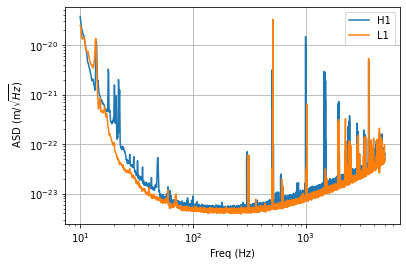

In [18]:
# Plot amplitude spectral density of the detectors
plt.loglog(freq, asd_H1, label='H1')
plt.loglog(freq, asd_L1, label='L1')
plt.legend()
plt.grid()
plt.ylabel(r" ASD (m/$\sqrt{Hz}$)")
plt.xlabel('Freq (Hz)')
plt.show()

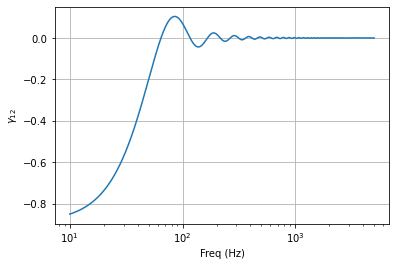

In [19]:
# Plot amplitude spectral density of the detectors
plt.semilogx(freq, gamma_funct(freq))
plt.grid()
plt.ylabel(r"$\gamma_{12}$")
plt.xlabel('Freq (Hz)')
plt.show()

In [20]:
# Some parameters
fref = 25 # reference frequency
T = 60*60*24*160 # duration of data in seconds

# overlap reduction factor at frequencies 'freq'
gamma_12 = gamma_funct(freq)

# conver asd to psd
psd1 = asd_H1**2
psd2 = asd_L1**2

In [21]:
alpha = 0 # for Cosmological background
sigma_COS = sigma_Omega(freq, psd1, psd2, gamma_12, T, fref, alpha)
print("The sigma of the analysis %3.2g" % sigma_COS)
print("The 95%% C.L. upper limit is %3.2g" % (2*sigma_COS))

The sigma of the analysis 7.4e-09
The 95% C.L. upper limit is 1.5e-08


In [22]:
alpha = 2/3 # for CBC background
sigma_CBC = sigma_Omega(freq, psd1, psd2, gamma_12, T, fref, alpha)
print("The sigma of the analysis %3.2g" % sigma_CBC)
print("The 95%% C.L. upper limit is %3.2g" % (2*sigma_CBC))

The sigma of the analysis 5.5e-09
The 95% C.L. upper limit is 1.1e-08


In [23]:
# SNRs 
Omega_gw_BBH = 5.0e-10
Omega_gw_BNS = 2.1e-10

# SNRs
print("The SNR of BBH background is %3.2e" % (Omega_gw_BBH/sigma_CBC))
print("The SNR of BNS background is %3.2e" % (Omega_gw_BNS/sigma_CBC))

The SNR of BBH background is 9.02e-02
The SNR of BNS background is 3.79e-02


In [24]:
gamma_12 = 1 # coloacted, coaligned detectors

alpha = 0 # for Cosmological background
sigma_COS = sigma_Omega(freq, psd1, psd2, gamma_12, T, fref, alpha)

alpha = 2/3 # for CBC background
sigma_CBC = sigma_Omega(freq, psd1, psd2, gamma_12, T, fref, alpha)

# SNRs
print("The SNR of BBH background is %3.2e" % (Omega_gw_BBH/sigma_CBC))
print("The SNR of BNS background is %3.2e" % (Omega_gw_BNS/sigma_CBC))

The SNR of BBH background is 4.68e-01
The SNR of BNS background is 1.97e-01


In [25]:
print("The SNR increase is %3.2e" %(4.68e-01/9.03e-02))

The SNR increase is 5.18e+00


In [26]:
freq, asd = np.loadtxt('curves_Jan_2020/aplus.txt',unpack=True)
psd1 = asd**2
psd2 = asd**2

gamma_12 = gamma_funct(freq)
alpha = 0 # for Cosmological background
sigma_COS = sigma_Omega(freq, psd1, psd2, gamma_12, T, fref, alpha)

alpha = 2/3 # for CBC background
sigma_CBC = sigma_Omega(freq, psd1, psd2, gamma_12, T, fref, alpha)

# SNRs
print("The SNR of BBH background is %3.2e" % (Omega_gw_BBH/sigma_CBC))
print("The SNR of BNS background is %3.2e" % (Omega_gw_BNS/sigma_CBC))

The SNR of BBH background is 5.55e-01
The SNR of BNS background is 2.33e-01


In [27]:
freq, asd = np.loadtxt('curves_Jan_2020/et_d.txt',unpack=True)
psd1 = asd**2
psd2 = asd**2

gamma_12 = -0.375
alpha = 0 # for Cosmological background
sigma_COS = sigma_Omega(freq, psd1, psd2, gamma_12, T, fref, alpha)

alpha = 2/3 # for CBC background
sigma_CBC = sigma_Omega(freq, psd1, psd2, gamma_12, T, fref, alpha)

# SNRs
print("The SNR of BBH background is %3.2e" % (Omega_gw_BBH/sigma_CBC))
print("The SNR of BNS background is %3.2e" % (Omega_gw_BNS/sigma_CBC))

The SNR of BBH background is 6.99e+01
The SNR of BNS background is 2.94e+01
